# An Analysis of Wind Characteristics for Power Generation

<!-- Use left, center or right. Font size doesn't seem to change.-->
<p>
<!-- <div style="text-align: center" font=10 weight=bold> Galway Wind Park </div> -->
<div style="text-align: center;">
    <img src="img/Galway-Wind-Park.jpg" width="50%">
</div>
<div style="text-align: center" font = 7> Galway Wind Park </div> 
</p>

****

## Overview

Wind plays an important part in the global move away from fossil fuels to renewables for electricity generation. Ireland in particular has a huge potential for power generation from both onshore and offshore wind which, we have only begun to exploit.  
  
According to the [SEAI](https://www.seai.ie/renewable-energy/wind-energy#:~:text=Wind%20energy%20in%20Ireland&text=It%20is%20both%20Ireland's%20largest,in%20Ireland%20after%20natural%20gas), wind is "both Ireland's largest and cheapest renewable electricity resource. In 2020 Wind provided over 86% of Ireland's renewable electricity and 36% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas."  
  
This report examines the suitablility of a selection of locations around the country for power generation from onshore wind, using data from [Met Éireann's weather stations](https://www.met.ie/climate/available-data/historical-data).

****

| Topic | Details |  
|---------|-------------|  
| **Module:**  | 4369 - Programming for Data Analytics  |  
| **Lecturer:**  | Andrew Beatty  |  
| **Course:**  | Higher Diploma in Science in Computing (Data Analytics)  |  
| **Year/Semester:**  | Year 1 / Semester 2  |  
| **Student Name:**  | David O'Connell  |  
| **Student ID:**  | G00438912  |  
| **Student Email:**  | G00438912@atu.ie  |  
   
****  

## Contents  
- Overview  
- Packages Used  
- Source Data  

Load the Data  
Inspect the Data  
Analyze the Data  
Summary and Conclusions    
References 

#### Note on internal links  
As GitHub renders this document in an iframe, internal links will not work and are not used.

## Packages Used  
This project makes use of the following packages for analysis and visualization of the wind data.
   
| Software | Version | Summary|  
|---------|-------------|---------|  
|[VS Code](https://code.visualstudio.com/) | 1.95.3 | Visual Studio Code is a lightweight but powerful source code editor which runs on your desktop. |  
|[Jupyter Notebook](https://jupyter.org/)| v2024.11.0 | VS Code extension for Jupyter Notebook support, interactive programming and computing that supports Intellisense, debugging and more. |  
<p>
<div style="text-align: center" font = 7> Table 1: Software Versions </div> 
</p>

See below for the packages used with Python.

*Note:* Extensive use has been made of the Pandas DataFrame data structure, which is similar to an Excel worksheet. Pandas provides functionality to read data from csv and other file types into the DataFrame structure, and to perform operations on the rows, columns and individual entries in that DataFrame.

In [97]:
# Import the required packages
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import datetime as dt

print("Key Package Versions")
print("--------------------")
print("Python:\t\t", platform.python_version(), "\tA programming language for system integration and data manipulation")
print("NumPy:\t\t", np.__version__, "\tAn open source project for numerical computing with Python")
print("Matplotlib:\t", mpl.__version__, "\t\tA library for static, animated and interactive visualizations in Python")
print("Pandas:\t\t", pd.__version__, "\t\tA library for data manipulation and analysis with Python")
print("Seaborn:\t", sns.__version__, "\tA Python data visualization library based on matplotlib")

Key Package Versions
--------------------
Python:		 3.11.7 	A programming language for system integration and data manipulation
NumPy:		 1.26.4 	An open source project for numerical computing with Python
Matplotlib:	 3.8.0 		A library for static, animated and interactive visualizations in Python
Pandas:		 2.1.4 		A library for data manipulation and analysis with Python
Seaborn:	 0.13.2 	A Python data visualization library based on matplotlib


## Source Data

### Weather Data
Wind speed data was retrieved from [Met Éireann's Historical Data](https://www.met.ie/climate/available-data/historical-data) site. 

Datasets are available from across the suite of [441 manual, automatic, climatological and rainfall stations](https://www.met.ie/climate/what-we-measure) - however, most of these are rainfall stations, with the 25 synoptic weather stations recording a broader set of parameters including temperature, wind speed, direction and gust strength, rainfall, humidity, pressure and general weather conditions. The manned and automatic synoptic weather stations are shown in Figure 1a) and 1b).  

<p>
<!-- <div style="text-align: center" font=10 weight=bold> Galway Wind Park </div> -->
<div style="text-align: center;">
    <img src="img/Airports.png" width="40%">
    <img src="img/synoptic.png" width="40.65%">
</div>
<div style="text-align: center" font = 7> Figure 1a) Manual and 1b) Automatic Synoptic Weather Stations </div> 
</p>  

The data at Met Éireann's Historical Data site is not available via an API, the fields must be selected manually and the resulting zip files downloaded. The data is contained in the zip file in csv format.  

### Wind Turbine Data  
Wind turbines typically start operating at wind speeds around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at around 11-14 m/s or 25-30 mph (source - [Enerpower Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)).  
  
Consistent wind behaviour is more important than the speed for producing power most efficiently and consistently. 
  
<center>  

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |

</center>  
<p>
<div style="text-align: center" font = 7> Table 2: General Turbine Behaviour by Wind Speed </div> 
</p>  
  

To take a specific and local example, the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/), located in the Cloosh Valley south-west of Oughterard, makes use of the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) for its wind-powered electricity generation. 58 of these turbines are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/) in 2024. This wind farm utilises 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.  
  
Performance data for the Siemens SWT-3.0-101 3MW turbine was retrieved from [this site](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php). The performance can be classified as classified for various wind speeds as follows.  
  
<center>  

| Wind Speed m/s | Performance |  
|----------------|-----------------|  
| Below 4  | Unacceptable  |  
| Between 4 and 8  | Poor  |  
| Between 8 and 11  | Good  |  
| Between 11 and 25  | Optimal  |  
| Above 25  | Unacceptable  |  

</center>  
<p>
<div style="text-align: center" font = 7> Table 3: Siemens Turbine Performance by Wind Speed </div> 
</p>  

(0.0, 27.0)

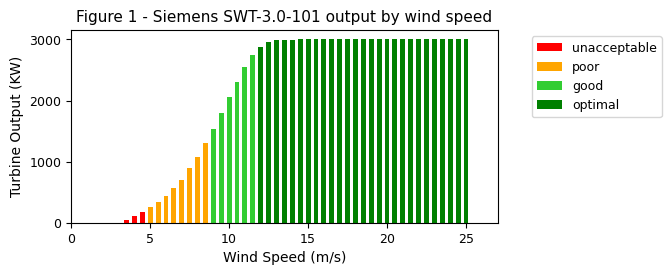

In [98]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
output = ['unacceptable','poor','good','optimal']
colours = ['red', 'orange', 'limegreen', 'green']
colourmap = {output[0]:colours[0], output[1]:colours[1], output[2]:colours[2], output[3]:colours[3]}

axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color=colours[0],width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color=colours[1],width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color=colours[2],width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color=colours[3],width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color=colours[0],width=0.31)
axes.set_title('Figure 1 - Siemens SWT-3.0-101 output by wind speed', fontsize=11)
axes.set_xlabel('Wind Speed (m/s)', fontsize=10)
axes.set_ylabel('Turbine Output (KW)', fontsize=10)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])


## Analysis - Weather Data
While there are 31 weather stations in Galway making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), most focus on precipitation and only 2 provide wind speed - Athenry and Mace Head. The study will focus on data from Athenry weather station.

According to the information in the header of the downloaded csv file, the fields we are interested in are:  
  
date:  -  00 to 00 utc  
wdsp:  -  Mean Wind Speed (kt)  
hm:    -  Highest ten minute mean wind speed (kt)                 
hg:    -  Highest Gust (kt)  

'kt' is the abbreviation for knot, or nautical miles per hour.  They convert as follows.  
  
| unit | knots | miles per hour |  kilometres per hour |  metres per second |  
|----------------|-----------------|--------------|--------------|--------------|  
| speed  | 1.0  | 1.151  |  1.852  | 0.514  |  

**Table 3:** Unit Conversions  

In [99]:
# Create a dataframe with the fields we are interested in.
athenry_weather = pd.read_csv("data/dly1875.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather['date']= pd.to_datetime(belmullet_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2000-01-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
belmullet_weather = belmullet_weather.loc[(belmullet_weather['date']>=date1) & (belmullet_weather['date']<=date2)]
belmullet_weather = belmullet_weather.reset_index(drop=True)
belmullet_weather.dtypes

date    datetime64[ns]
wdsp           float64
hm              object
hg              object
dtype: object

In [100]:
# Review the first few rows
belmullet_weather.head(3)

,date,wdsp,hm,hg
0,2000-01-01,21.3,28,41
1,2000-01-02,20.0,47,67
2,2000-01-03,20.1,31,48


Windspeed was created as an object, because some cells countain a white space where wind data was not available on the day.
To convert to a numeric column, we need to replace the white space with a value that will be recognized as a number.

In [101]:
#for row in athenry_weather.itertuples():
    #if row.wdsp == ' ':
    #    print('found blank ', row)

athenry_weather['wdsp'] = athenry_weather['wdsp'].replace(' ',-999)
athenry_weather['wdsp'] = athenry_weather['wdsp'].astype(float)
athenry_weather['wdsp'] = athenry_weather['wdsp'].replace(-999,np.nan)
athenry_weather.dtypes


date     object
wdsp    float64
hm        int64
hg        int64
dtype: object

Next, convert wind speed from knots to metres per second (m/s), to align with the turbine ratings.  

In [102]:
knots_to_metres_per_sec = 0.514  # from Table 3 above
belmullet_weather['wdsp_ms']=round(belmullet_weather['wdsp']*knots_to_metres_per_sec, 2)
belmullet_weather.head(3)

,date,wdsp,hm,hg,wdsp_ms
0,2000-01-01,21.3,28,41,10.95
1,2000-01-02,20.0,47,67,10.28
2,2000-01-03,20.1,31,48,10.33


Text(0.5, 0, 'Date')

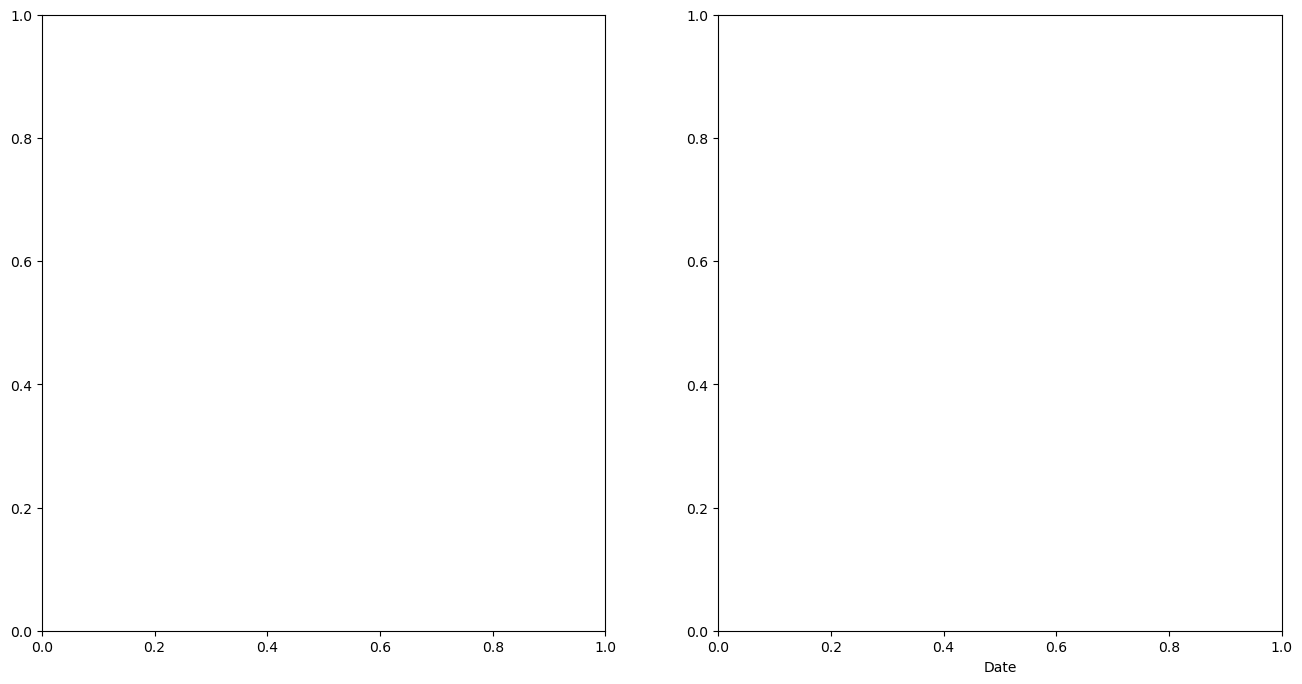

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax1 = axes[0]
ax2 = axes[1]
#ax1.plot(athenry_weather["date"], belmullet_weather["wdsp"]) # Comment out for now as takes a long time to run
plt.xlabel('Date')

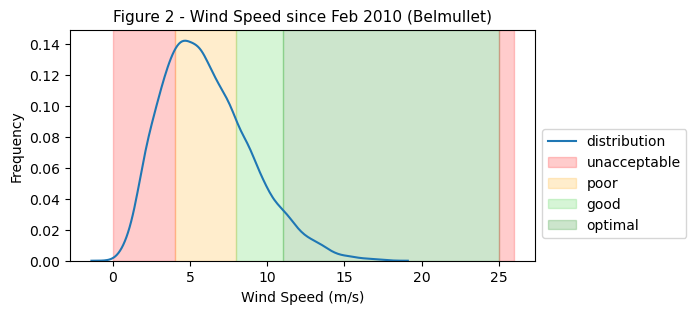

In [104]:
fig, axd = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axd = sns.kdeplot(belmullet_weather["wdsp_ms"], ax=axd)
#plt.axvline(x=4, color='red', linestyle='--')
axd.axvspan(0, 4, alpha=0.2, color=colours[0])
axd.axvspan(4, 8, alpha=0.2, color=colours[1])
axd.axvspan(8, 11, alpha=0.2, color=colours[2])
axd.axvspan(11, 25, alpha=0.2, color=colours[3])
axd.axvspan(25, 26, alpha=0.2, color=colours[0])
output1 = output.copy()
axd.set_title('Figure 2 - Wind Speed since Feb 2010 (Belmullet)', fontsize=11)
axd.set_xlabel('Wind Speed (m/s)', fontsize=10)
axd.set_ylabel('Frequency', fontsize=10)
# Allow this cell to be run independently multiple times
if output1[0] != "distribution":
    output1.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output1)
plt.show()


In [105]:
belmullet_weather.describe()

,date,wdsp,wdsp_ms
count,9101,9101.000000,9101.000000
mean,2012-06-16 00:00:00,11.869454,6.100877
min,2000-01-01 00:00:00,0.000000,0.000000
25%,2006-03-25 00:00:00,7.700000,3.960000
50%,2012-06-16 00:00:00,11.100000,5.710000
75%,2018-09-08 00:00:00,15.300000,7.860000
max,2024-11-30 00:00:00,34.500000,17.730000
std,NaN,5.555387,2.855472


We will now add a column to the weather dataframe to categorize the windspeed as defined in Table 2 above.  
This will allow us to quantitatively assess how suitable Athenry is as a site.

In [106]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 
belmullet_weather['category']=''
count=0
for row in belmullet_weather.itertuples():
    #print (row.wdsp_ms, end = ' ')
    if row.wdsp_ms <= 4.0:
        belmullet_weather.loc[count, 'category'] = output[0]
    elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
        belmullet_weather.loc[count, 'category'] = output[1]
    elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
        belmullet_weather.loc[count, 'category'] = output[2]
    elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
        belmullet_weather.loc[count, 'category'] = output[3]
    else:
        belmullet_weather.loc[count, 'category'] = output[0]
    count += 1

belmullet_weather.head(3)

,date,wdsp,hm,hg,wdsp_ms,category
0,2000-01-01,21.3,28,41,10.95,good
1,2000-01-02,20.0,47,67,10.28,good
2,2000-01-03,20.1,31,48,10.33,good


In [107]:
summary = belmullet_weather['category'].value_counts()
print(summary)

category
poor            4641
unacceptable    2307
good            1595
optimal          558
Name: count, dtype: int64


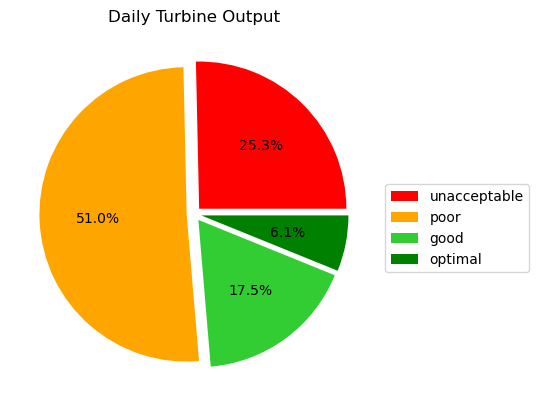

In [108]:
exp=[0.05, 0.05, 0.05, 0.05]

summary = summary.reindex(output)

summary.plot.pie(ylabel='',labels=None,title='Daily Turbine Output',autopct='%1.1f%%', colors=[colourmap[key] for key in summary.index], explode=exp)

# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=summary.index)
plt.subplots_adjust(right=0.7)

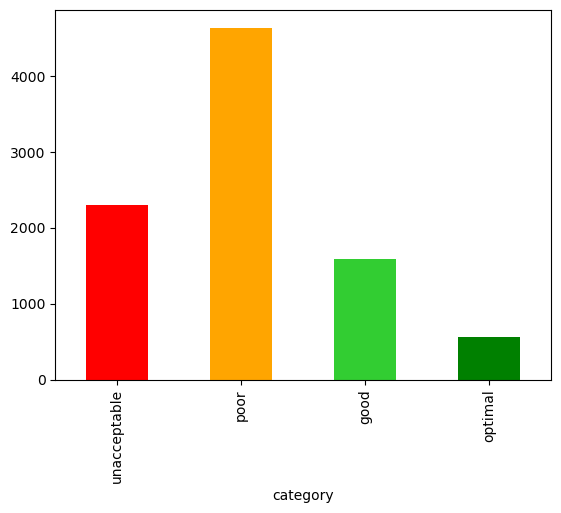

In [109]:
summary.plot.bar(color=[colourmap[key] for key in summary.index])
plt.show()

As can be seen from Figure (the pie chart), Athenry is not a suitable location for a wind farm. We will next look at a few other stations from around the country.


In [110]:
# Create a dataframe with the fields we are interested in.
macehead_weather = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
macehead_weather.dtypes

date    object
wdsp    object
hm      object
hg      object
dtype: object

In [111]:
macehead_weather.head(3)

,date,wdsp,hm,hg
0,14-aug-2003,6.7,13,17
1,15-aug-2003,6.5,12,15
2,16-aug-2003,5.7,10,13


In [112]:
macehead_weather['wdsp'] = macehead_weather['wdsp'].replace(' ',-999)
macehead_weather['wdsp'] = macehead_weather['wdsp'].astype(float)
macehead_weather['wdsp'] = macehead_weather['wdsp'].replace(-999,np.nan)
macehead_weather.dtypes

date     object
wdsp    float64
hm       object
hg       object
dtype: object

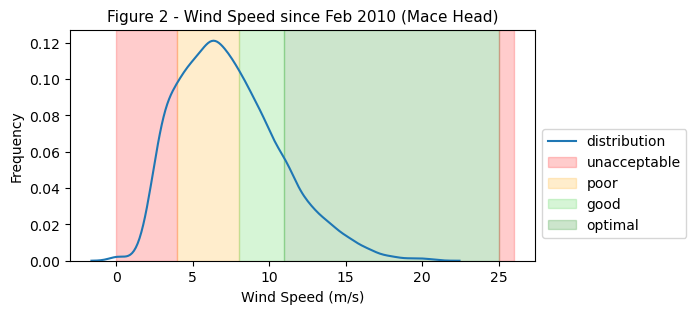

In [113]:
macehead_weather['wdsp_ms']=round(macehead_weather['wdsp']*knots_to_metres_per_sec, 2)
fig, axmh = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axmh = sns.kdeplot(macehead_weather["wdsp_ms"], ax=axmh)
#plt.axvline(x=4, color='red', linestyle='--')
axmh.axvspan(0, 4, alpha=0.2, color=colours[0])
axmh.axvspan(4, 8, alpha=0.2, color=colours[1])
axmh.axvspan(8, 11, alpha=0.2, color=colours[2])
axmh.axvspan(11, 25, alpha=0.2, color=colours[3])
axmh.axvspan(25, 26, alpha=0.2, color=colours[0])
output2 = output.copy()
axmh.set_title('Figure 2 - Wind Speed since Feb 2010 (Mace Head)', fontsize=11)
axmh.set_xlabel('Wind Speed (m/s)', fontsize=10)
axmh.set_ylabel('Frequency', fontsize=10)
# Allow this cell to be run independently multiple times
if output2[0] != "distribution":
    output2.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output2)
plt.show()


In [114]:
macehead_weather['date2']= pd.to_datetime(macehead_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
macehead_weather = macehead_weather.loc[(macehead_weather['date2']>=date1) & (macehead_weather['date2']<=date2)]
print(macehead_weather.head(3))
print(macehead_weather.tail(3))


             date  wdsp  hm  hg  wdsp_ms      date2
2340  01-mar-2010   4.4  10  12     2.26 2010-03-01
2341  02-mar-2010  14.0  20  27     7.20 2010-03-02
2342  03-mar-2010   8.0  18  26     4.11 2010-03-03
             date  wdsp  hm  hg  wdsp_ms      date2
7726  28-nov-2024  20.4  28  37    10.49 2024-11-28
7727  29-nov-2024  16.8  24  34     8.64 2024-11-29
7728  30-nov-2024  19.8  29  39    10.18 2024-11-30


In [115]:
# Function to clean up missing data and return the same number of entries from each dataset
def clean_data(df):
    #pd.options.mode.copy_on_write = True
    temp_df=df
    temp_df['date']= pd.to_datetime(temp_df['date'], format='%d-%b-%Y')
    date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
    date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
    temp_df = temp_df.loc[(temp_df['date']>=date1) & (temp_df['date']<=date2)]
    temp_df = temp_df.reset_index(drop=True)
    temp_df['wdsp'] = temp_df['wdsp'].replace(' ',-999)
    temp_df['wdsp'] = temp_df['wdsp'].astype(float)
    temp_df['wdsp'] = temp_df['wdsp'].replace(-999,np.nan)
    temp_df['wdsp_ms']=round(temp_df['wdsp']*knots_to_metres_per_sec, 2)
    return temp_df

# copy in the data for each of the selected stations, then normalise it 
weather_belmullet = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_belmullet = clean_data(weather_belmullet)

weather_macehead = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_macehead = clean_data(weather_macehead)

weather_dunsany = pd.read_csv("data/dly1375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_dunsany = clean_data(weather_dunsany)

weather_malinhead = pd.read_csv("data/dly1575.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_malinhead = clean_data(weather_malinhead)

weather_johnstown = pd.read_csv("data/dly1775.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_johnstown = clean_data(weather_johnstown)

weather_valentia = pd.read_csv("data/dly2275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_valentia = clean_data(weather_valentia)

# Now create a combined dataframe with the windspeed column from each of the individual files
weather_all = weather_belmullet.copy()
weather_all.drop(columns=['wdsp'], inplace=True)
weather_all.rename(columns={'wdsp_ms': 'wdspms_belmullet'}, inplace=True)

weather_all['wdspms_dunsany'] = weather_dunsany['wdsp_ms']
weather_all['wdspms_johnstown'] = weather_johnstown['wdsp_ms']
weather_all['wdspms_macehead'] = weather_macehead['wdsp_ms']
weather_all['wdspms_malinhead'] = weather_malinhead['wdsp_ms']
weather_all['wdspms_valentia'] = weather_valentia['wdsp_ms']

weather_all.head(5)


,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
0,2010-03-01,0.72,1.64,2.06,2.26,6.12,1.54
1,2010-03-02,5.09,2.83,2.47,7.20,4.16,6.01
2,2010-03-03,4.16,3.24,3.55,4.11,6.37,2.67
3,2010-03-04,1.13,2.06,3.65,3.44,3.60,2.62
4,2010-03-05,0.87,1.64,2.72,2.31,5.04,1.54


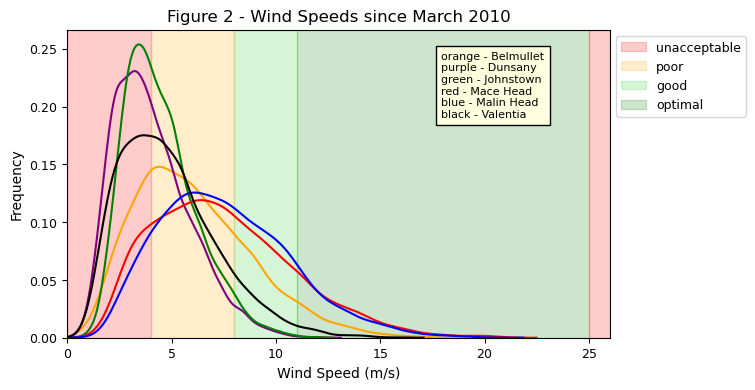

In [116]:
fig, ax_combined = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax_combined.axvspan(0, 4, alpha=0.2, color=colours[0])
ax_combined.axvspan(4, 8, alpha=0.2, color=colours[1])
ax_combined.axvspan(8, 11, alpha=0.2, color=colours[2])
ax_combined.axvspan(11, 25, alpha=0.2, color=colours[3])
ax_combined.axvspan(25, 26, alpha=0.2, color=colours[0])
ax_combined.set_title('Figure 2 - Wind Speeds since March 2010', fontsize=12)
ax_combined.set_xlabel('Wind Speed (m/s)', fontsize=10)
ax_combined.set_ylabel('Frequency', fontsize=10)
ax_combined.set_xlim(0, 26)

ax_combined = sns.kdeplot(weather_all["wdspms_belmullet"], ax=ax_combined, color='orange')
ax_combined = sns.kdeplot(weather_all["wdspms_dunsany"], ax=ax_combined, color='purple')
ax_combined = sns.kdeplot(weather_all["wdspms_johnstown"], ax=ax_combined, color='green')
ax_combined = sns.kdeplot(weather_all["wdspms_macehead"], ax=ax_combined, color='red')
ax_combined = sns.kdeplot(weather_all["wdspms_malinhead"], ax=ax_combined, color='blue')
ax_combined = sns.kdeplot(weather_all["wdspms_valentia"], ax=ax_combined, color='black')
colour_code = "orange - Belmullet\npurple - Dunsany\ngreen - Johnstown\nred - Mace Head\nblue - Malin Head\nblack - Valentia"
ax_combined.text(0.689, 0.93, colour_code, transform=ax_combined.transAxes, fontsize=8, va='top', bbox=dict(facecolor='lightyellow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=output, fontsize = 9)
plt.show()

In [117]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 

def categorise_wind(df):
    temp_df=df
    temp_df['category']=''
    count=0
    for row in temp_df.itertuples():
        if row.wdsp_ms <= 4.0:
            temp_df.loc[count, 'category'] = output[0]
        elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
            temp_df.loc[count, 'category'] = output[1]
        elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
            temp_df.loc[count, 'category'] = output[2]
        elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
            temp_df.loc[count, 'category'] = output[3]
        else:
            temp_df.loc[count, 'category'] = output[0]
        count += 1
    return temp_df

weather_belmullet = categorise_wind(weather_belmullet)
weather_dunsany = categorise_wind(weather_dunsany)
weather_johnstown = categorise_wind(weather_johnstown)
weather_macehead = categorise_wind(weather_macehead)
weather_malinhead = categorise_wind(weather_malinhead)
weather_valentia = categorise_wind(weather_valentia)

weather_all['category_belmullet'] = weather_belmullet['category']
weather_all['category_dunsany'] = weather_dunsany['category']
weather_all['category_johnstown'] = weather_johnstown['category']
weather_all['category_macehead'] = weather_macehead['category']
weather_all['category_malinhead'] = weather_malinhead['category']
weather_all['category_valentia'] = weather_valentia['category']

summary_belmullet = weather_belmullet['category'].value_counts().reindex(output)
summary_dunsany = weather_dunsany['category'].value_counts().reindex(output)
summary_johnstown = weather_johnstown['category'].value_counts().reindex(output)
summary_macehead = weather_macehead['category'].value_counts().reindex(output)
summary_malinhead = weather_malinhead['category'].value_counts().reindex(output)
summary_valentia = weather_valentia['category'].value_counts().reindex(output)

summary_all = summary_belmullet.copy()
summary_all = summary_all.to_frame('count_belmullet')
summary_all['count_dunsany'] = summary_dunsany.to_frame('count_dunsany')
summary_all['count_johnstown'] = summary_johnstown.to_frame('count_johnstown')
summary_all['count_macehead'] = summary_macehead.to_frame('count_macehead')
summary_all['count_malinhead'] = summary_malinhead.to_frame('count_malinhead')
summary_all['count_valentia'] = summary_valentia.to_frame('count_valentia')
summary_all.head(6)

,count_belmullet,count_dunsany,count_johnstown,count_macehead,count_malinhead,count_valentia
category,,,,,,
unacceptable,1384,2964,2462,811,638,2222
poor,2781,2246,2722,2461,2535,2629
good,925,175,202,1328,1495,455
optimal,299,4,3,789,721,83


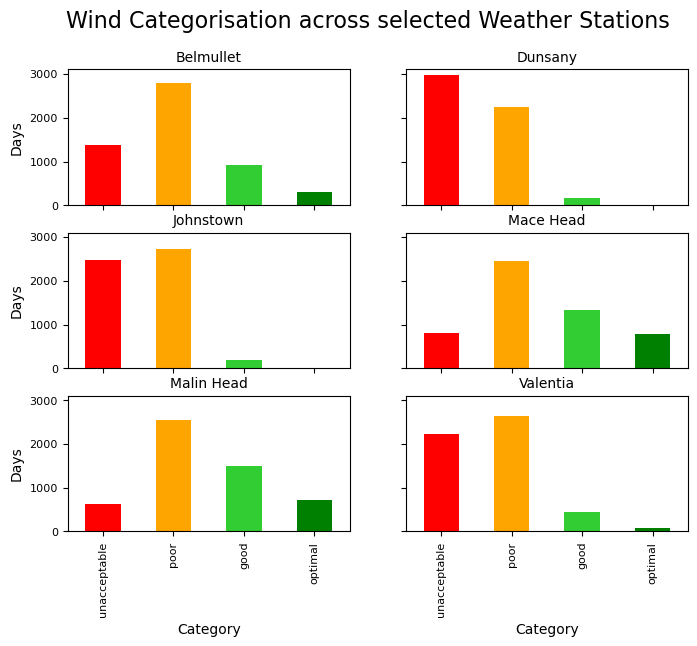

In [118]:
fig_all, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex='col', sharey='row')
fig_all.suptitle('Wind Categorisation across selected Weather Stations', fontsize=16)
summary_all.get('count_belmullet').plot.bar(ax=ax_all[0,0],color=[colourmap[key] for key in summary_all.index])

ax_all[0,0].set_title('Belmullet', fontsize=10)
ax_all[0,0].set_ylabel('Days', fontsize=10)
ax_all[0,0].tick_params(axis='y', labelsize=8)
ax_all[0,0].set_ylim(0, 3100)

summary_all.get('count_dunsany').plot.bar(ax=ax_all[0,1],color=[colourmap[key] for key in summary_all.index])
ax_all[0,1].set_title('Dunsany', fontsize=10)

summary_all.get('count_johnstown').plot.bar(ax=ax_all[1,0],color=[colourmap[key] for key in summary_all.index])
ax_all[1,0].set_title('Johnstown', fontsize=10)
ax_all[1,0].set_ylabel('Days', fontsize=10)
ax_all[1,0].tick_params(axis='y', labelsize=8)
ax_all[1,0].set_ylim(0, 3100)

summary_all.get('count_macehead').plot.bar(ax=ax_all[1,1],color=[colourmap[key] for key in summary_all.index])
ax_all[1,1].set_title('Mace Head', fontsize=10)

summary_all.get('count_malinhead').plot.bar(ax=ax_all[2,0],color=[colourmap[key] for key in summary_all.index])
ax_all[2,0].set_title('Malin Head', fontsize=10)
ax_all[2,0].set_ylabel('Days', fontsize=10)
ax_all[2,0].tick_params(axis='x', labelsize=8)
ax_all[2,0].tick_params(axis='y', labelsize=8)
ax_all[2,0].set_xlabel('Category', fontsize=10)
ax_all[2,0].set_ylim(0, 3100)

summary_all.get('count_valentia').plot.bar(ax=ax_all[2,1],color=[colourmap[key] for key in summary_all.index])
ax_all[2,1].set_title('Valentia', fontsize=10)
ax_all[2,1].set_xlabel('Category', fontsize=10)
ax_all[2,1].tick_params(axis='x', labelsize=8)

plt.show()

## Forward View
In this section, we will extrapolate the 1 month mean line to see if there  wind is going to 

In [119]:
# Now copy in the last 3 years and ewxtrapolate the 1 month rolling mean mean for 10 years.

## References
g1. https://en.wikipedia.org/wiki/Galway_Wind_Park

https://stackoverflow.com/questions/69335720/overlay-shaded-regions-on-a-line-plot-based-on-conditions


## Source Data

### Weather Data
[Met Eireann Historical Data](https://www.met.ie/climate/available-data/historical-data)

Daily data is available from the 25 synoptic weather stations here
https://www.met.ie/climate/available-data/daily-data




### Wind Speed
from [Google's Generative AI](https://www.google.com)
Large-scale wind turbines typically start turning at wind speeds of 7–9 miles per hour and reach their maximum output at around 27 miles per hour. They begin to reduce power or disconnect at wind speeds above 25 miles per hour. At these high speeds, the turbine's braking system activates to prevent damage to the blades. 
Efficiency
Wind turbines are most efficient at around 18 miles per hour. 
The consistency of the wind is more important than the speed for producing the most wind power. 

[Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)
Wind turbines typically start operating at wind speeds around Beaufort Force 3, or around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at Beaufort 5 (around 11-14 m/s or 25-30 mph).  1609.3m in a mile

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |  

**Table 1:** General Turbine Behaviour BY Wind Speed  

To take a specific example, the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) is use in the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/), located in the Cloosh Valley south-west of Oughterard in Co. Galway. 58 of these are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/), which utilises 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.

## Background - Wind Turbines
Performance data for the Siemens SWT-3.0-101 3MW turbine was retrieved from [this site](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php). The performance can be classified as classified for various wind speeds as follows.  
  
| Wind Speed m/s | Performance |  
|----------------|-----------------|  
| Below 4  | Unacceptable  |  
| Between 4 and 8  | Poor  |  
| Between 8 and 11  | Good  |  
| Between 11 and 25  | Optimal  |  
| Above 25  | Unacceptable  |  

**Table 2:** Siemens Turbine Performance by Wind Speed  

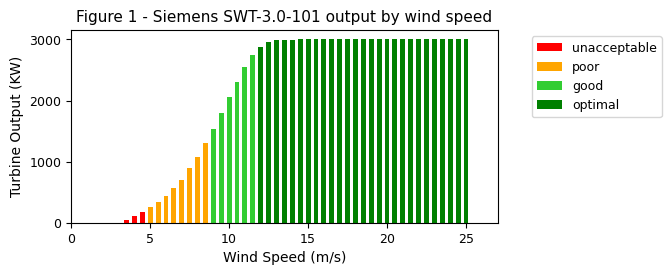

In [120]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
output = ['unacceptable','poor','good','optimal']
colours = ['red', 'orange', 'limegreen', 'green']
colourmap = {output[0]:colours[0], output[1]:colours[1], output[2]:colours[2], output[3]:colours[3]}

axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color=colours[0],width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color=colours[1],width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color=colours[2],width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color=colours[3],width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color=colours[0],width=0.31)
axes.set_title('Figure 1 - Siemens SWT-3.0-101 output by wind speed', fontsize=11)
axes.set_xlabel('Wind Speed (m/s)', fontsize=10)
axes.set_ylabel('Turbine Output (KW)', fontsize=10)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])
plt.show()

## Analysis - Weather Data
### Source Selection
While there are 31 weather stations in Galway making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), most focus on precipitation and only 2 provide wind speed - Athenry and Mace Head. The study will focus on data from Athenry weather station.

According to the information in the header of the downloaded csv file, the fields we are interested in are:  
  
date:  -  00 to 00 utc  
wdsp:  -  Mean Wind Speed (kt)  
hm:    -  Highest ten minute mean wind speed (kt)                 
hg:    -  Highest Gust (kt)  

### Units
All wind speed and highest gust units are in knots (kt). A knot is one nautical mile per hour, and converts to other units as follows.  
  
| unit | knots | miles per hour |  kilometres per hour |  metres per second |  
|----------------|-----------------|--------------|--------------|--------------|  
| speed  | 1.0  | 1.151  |  1.852  | 0.514  |  

**Table 3:** Unit Conversions  

In [121]:
# Create a dataframe with the fields we are interested in.
athenry_weather = pd.read_csv("data/dly1875.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather['date']= pd.to_datetime(belmullet_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2000-01-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
belmullet_weather = belmullet_weather.loc[(belmullet_weather['date']>=date1) & (belmullet_weather['date']<=date2)]
belmullet_weather = belmullet_weather.reset_index(drop=True)
belmullet_weather.dtypes

date    datetime64[ns]
wdsp           float64
hm              object
hg              object
dtype: object

In [122]:
# Review the first few rows
belmullet_weather.head(3)

,date,wdsp,hm,hg
0,2000-01-01,21.3,28,41
1,2000-01-02,20.0,47,67
2,2000-01-03,20.1,31,48


Windspeed was created as an object, because some cells countain a white space where wind data was not available on the day.
To convert to a numeric column, we need to replace the white space with a value that will be recognized as a number.

In [123]:
#for row in athenry_weather.itertuples():
    #if row.wdsp == ' ':
    #    print('found blank ', row)

athenry_weather['wdsp'] = athenry_weather['wdsp'].replace(' ',-999)
athenry_weather['wdsp'] = athenry_weather['wdsp'].astype(float)
athenry_weather['wdsp'] = athenry_weather['wdsp'].replace(-999,np.nan)
athenry_weather.dtypes


date     object
wdsp    float64
hm        int64
hg        int64
dtype: object

Next, convert wind speed from knots to metres per second (m/s), to align with the turbine ratings.  

In [124]:
knots_to_metres_per_sec = 0.514  # from Table 3 above
belmullet_weather['wdsp_ms']=round(belmullet_weather['wdsp']*knots_to_metres_per_sec, 2)
belmullet_weather.head(3)

,date,wdsp,hm,hg,wdsp_ms
0,2000-01-01,21.3,28,41,10.95
1,2000-01-02,20.0,47,67,10.28
2,2000-01-03,20.1,31,48,10.33


Text(0.5, 0, 'Date')

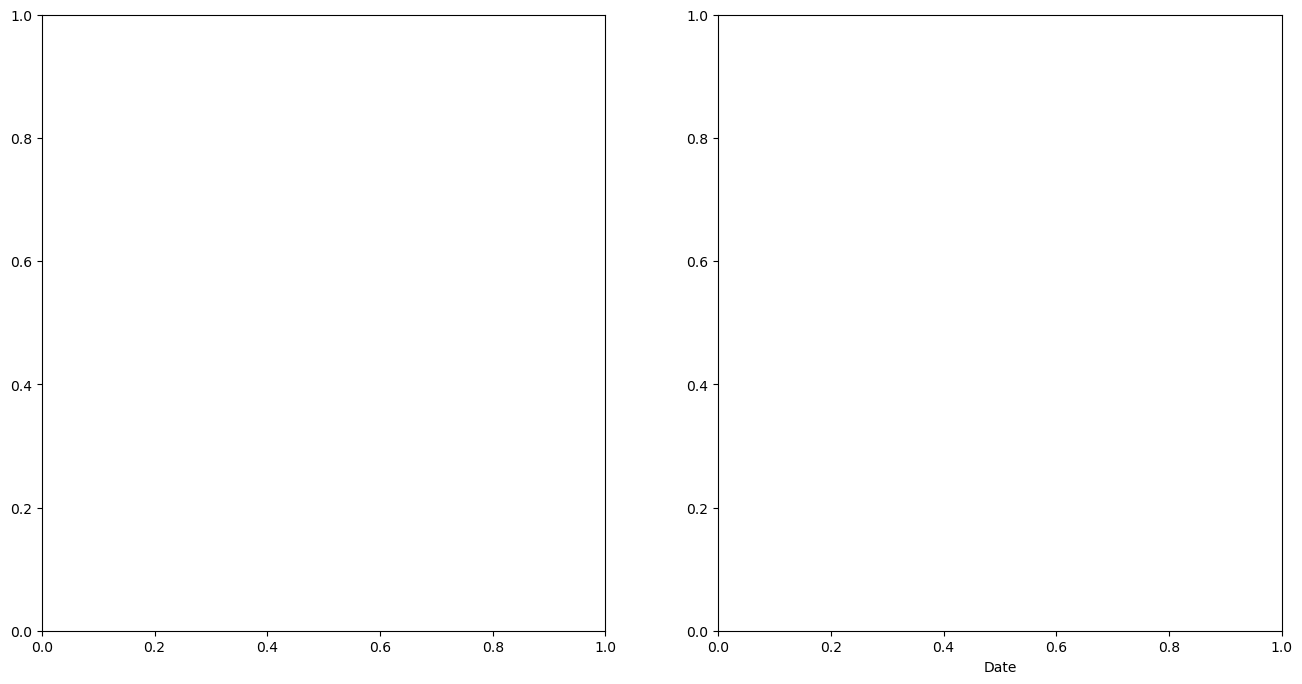

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax1 = axes[0]
ax2 = axes[1]
#ax1.plot(athenry_weather["date"], belmullet_weather["wdsp"]) # Comment out for now as takes a long time to run
plt.xlabel('Date')

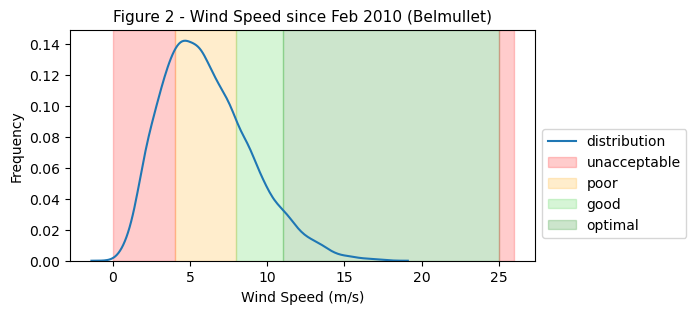

In [126]:
fig, axd = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axd = sns.kdeplot(belmullet_weather["wdsp_ms"], ax=axd)
#plt.axvline(x=4, color='red', linestyle='--')
axd.axvspan(0, 4, alpha=0.2, color=colours[0])
axd.axvspan(4, 8, alpha=0.2, color=colours[1])
axd.axvspan(8, 11, alpha=0.2, color=colours[2])
axd.axvspan(11, 25, alpha=0.2, color=colours[3])
axd.axvspan(25, 26, alpha=0.2, color=colours[0])
output1 = output.copy()
axd.set_title('Figure 2 - Wind Speed since Feb 2010 (Belmullet)', fontsize=11)
axd.set_xlabel('Wind Speed (m/s)', fontsize=10)
axd.set_ylabel('Frequency', fontsize=10)
# Allow this cell to be run independently multiple times
if output1[0] != "distribution":
    output1.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output1)
plt.show()


In [127]:
print(output)

['unacceptable', 'poor', 'good', 'optimal']


We will now add a column to the weather dataframe to categorize the windspeed as defined in Table 2 above.  
This will allow us to quantitatively assess how suitable Athenry is as a site.

In [128]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 
belmullet_weather['category']=''
count=0
for row in belmullet_weather.itertuples():
    print (row.wdsp_ms, end = ' ')
    if row.wdsp_ms <= 4.0:
        belmullet_weather.loc[count, 'category'] = output[0]
    elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
        belmullet_weather.loc[count, 'category'] = output[1]
    elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
        belmullet_weather.loc[count, 'category'] = output[2]
    elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
        belmullet_weather.loc[count, 'category'] = output[3]
    else:
        belmullet_weather.loc[count, 'category'] = output[0]
    count += 1

belmullet_weather.head(3)

10.95 10.28 10.33 12.7 17.06 10.54 17.73 11.46 8.12 10.74 6.78 7.14 11.82 8.74 0.57 3.19 5.35 5.24 3.39 4.42 4.47 8.22 1.64 2.36 0.51 3.34 6.12 11.21 11.56 11.67 11.26 8.84 8.89 8.84 13.11 11.72 15.42 13.52 14.65 16.71 13.21 13.36 12.03 5.19 9.61 10.18 11.92 7.92 10.74 3.86 8.38 7.45 8.22 11.31 10.49 9.56 12.34 10.02 10.18 6.01 7.3 11.46 8.79 4.32 10.79 10.18 10.18 10.95 7.45 9.3 4.63 7.2 7.14 6.58 5.5 4.63 5.14 4.52 5.96 5.5 6.27 4.57 5.76 7.97 9.25 7.86 3.29 4.11 4.78 2.93 2.47 5.65 15.32 12.64 6.58 4.63 6.94 10.02 3.96 5.35 4.11 9.56 12.44 12.54 6.07 5.35 6.42 4.63 2.93 7.92 10.9 9.35 6.27 4.37 6.94 14.44 13.83 6.12 4.06 2.52 4.16 3.29 5.86 6.58 5.6 4.78 4.06 8.22 5.4 6.73 7.09 5.35 9.15 8.74 8.74 11.72 5.04 8.84 9.25 5.91 8.48 5.65 7.45 8.38 7.3 7.09 5.91 4.88 3.44 3.39 2.83 6.94 10.23 9.46 8.53 4.78 4.42 8.33 7.86 13.11 6.58 10.54 9.25 13.11 10.13 3.7 2.88 4.11 4.32 3.19 5.91 7.86 9.66 7.4 7.35 4.42 2.98 2.31 1.9 2.26 2.26 4.63 4.47 5.65 4.68 4.78 5.55 8.02 5.71 6.73 8.43 10.38 5.

,date,wdsp,hm,hg,wdsp_ms,category
0,2000-01-01,21.3,28,41,10.95,good
1,2000-01-02,20.0,47,67,10.28,good
2,2000-01-03,20.1,31,48,10.33,good


In [129]:
summary = belmullet_weather['category'].value_counts()
print(summary)

category
poor            4641
unacceptable    2307
good            1595
optimal          558
Name: count, dtype: int64


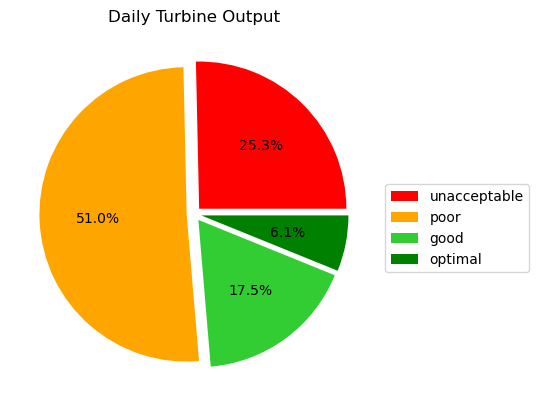

In [130]:
exp=[0.05, 0.05, 0.05, 0.05]

summary = summary.reindex(output)

summary.plot.pie(ylabel='',labels=None,title='Daily Turbine Output',autopct='%1.1f%%', colors=[colourmap[key] for key in summary.index], explode=exp)

# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=summary.index)
plt.subplots_adjust(right=0.7)

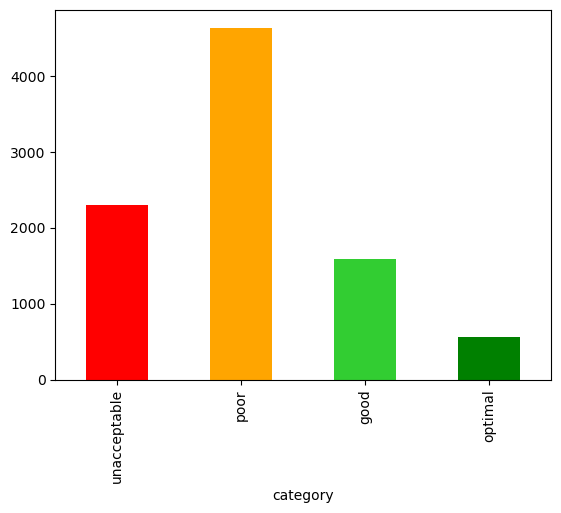

In [131]:
summary.plot.bar(color=[colourmap[key] for key in summary.index])
plt.show()

As can be seen from Figure (the pie chart), Athenry is not a suitable location for a wind farm. We will next look at a few other stations from around the country.


In [132]:
# Create a dataframe with the fields we are interested in.
macehead_weather = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
macehead_weather.dtypes

date    object
wdsp    object
hm      object
hg      object
dtype: object

In [133]:
macehead_weather.head(3)

,date,wdsp,hm,hg
0,14-aug-2003,6.7,13,17
1,15-aug-2003,6.5,12,15
2,16-aug-2003,5.7,10,13


In [134]:
macehead_weather['wdsp'] = macehead_weather['wdsp'].replace(' ',-999)
macehead_weather['wdsp'] = macehead_weather['wdsp'].astype(float)
macehead_weather['wdsp'] = macehead_weather['wdsp'].replace(-999,np.nan)
macehead_weather.dtypes

date     object
wdsp    float64
hm       object
hg       object
dtype: object

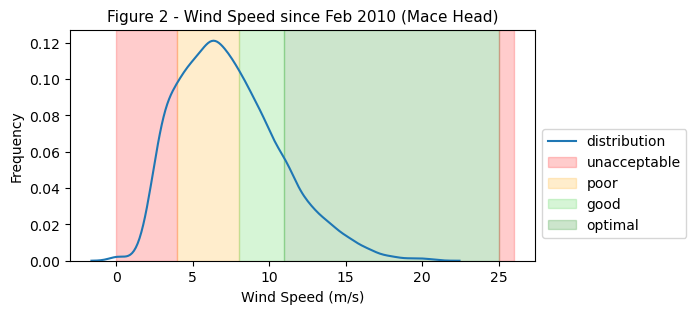

In [135]:
macehead_weather['wdsp_ms']=round(macehead_weather['wdsp']*knots_to_metres_per_sec, 2)
fig, axmh = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axmh = sns.kdeplot(macehead_weather["wdsp_ms"], ax=axmh)
#plt.axvline(x=4, color='red', linestyle='--')
axmh.axvspan(0, 4, alpha=0.2, color=colours[0])
axmh.axvspan(4, 8, alpha=0.2, color=colours[1])
axmh.axvspan(8, 11, alpha=0.2, color=colours[2])
axmh.axvspan(11, 25, alpha=0.2, color=colours[3])
axmh.axvspan(25, 26, alpha=0.2, color=colours[0])
output2 = output.copy()
axmh.set_title('Figure 2 - Wind Speed since Feb 2010 (Mace Head)', fontsize=11)
axmh.set_xlabel('Wind Speed (m/s)', fontsize=10)
axmh.set_ylabel('Frequency', fontsize=10)
# Allow this cell to be run independently multiple times
if output2[0] != "distribution":
    output2.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output2)
plt.show()


In [136]:
macehead_weather['date2']= pd.to_datetime(macehead_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
macehead_weather = macehead_weather.loc[(macehead_weather['date2']>=date1) & (macehead_weather['date2']<=date2)]
print(macehead_weather.head(3))
print(macehead_weather.tail(3))


             date  wdsp  hm  hg  wdsp_ms      date2
2340  01-mar-2010   4.4  10  12     2.26 2010-03-01
2341  02-mar-2010  14.0  20  27     7.20 2010-03-02
2342  03-mar-2010   8.0  18  26     4.11 2010-03-03
             date  wdsp  hm  hg  wdsp_ms      date2
7726  28-nov-2024  20.4  28  37    10.49 2024-11-28
7727  29-nov-2024  16.8  24  34     8.64 2024-11-29
7728  30-nov-2024  19.8  29  39    10.18 2024-11-30


In [137]:
# Function to clean up missing data and return the same number of entries from each dataset
def clean_data(df):
    #pd.options.mode.copy_on_write = True
    temp_df=df
    temp_df['date']= pd.to_datetime(temp_df['date'], format='%d-%b-%Y')
    date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
    date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
    temp_df = temp_df.loc[(temp_df['date']>=date1) & (temp_df['date']<=date2)]
    temp_df = temp_df.reset_index(drop=True)
    temp_df['wdsp'] = temp_df['wdsp'].replace(' ',-999)
    temp_df['wdsp'] = temp_df['wdsp'].astype(float)
    temp_df['wdsp'] = temp_df['wdsp'].replace(-999,np.nan)
    temp_df['wdsp_ms']=round(temp_df['wdsp']*knots_to_metres_per_sec, 2)
    return temp_df

# copy in the data for each of the selected stations, then normalise it 
weather_belmullet = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_belmullet = clean_data(weather_belmullet)

weather_macehead = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_macehead = clean_data(weather_macehead)

weather_dunsany = pd.read_csv("data/dly1375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_dunsany = clean_data(weather_dunsany)

weather_malinhead = pd.read_csv("data/dly1575.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_malinhead = clean_data(weather_malinhead)

weather_johnstown = pd.read_csv("data/dly1775.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_johnstown = clean_data(weather_johnstown)

weather_valentia = pd.read_csv("data/dly2275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_valentia = clean_data(weather_valentia)

# Now create a combined dataframe with the windspeed column from each of the individual files
weather_all = weather_belmullet.copy()
weather_all.drop(columns=['wdsp'], inplace=True)
weather_all.rename(columns={'wdsp_ms': 'wdspms_belmullet'}, inplace=True)

weather_all['wdspms_dunsany'] = weather_dunsany['wdsp_ms']
weather_all['wdspms_johnstown'] = weather_johnstown['wdsp_ms']
weather_all['wdspms_macehead'] = weather_macehead['wdsp_ms']
weather_all['wdspms_malinhead'] = weather_malinhead['wdsp_ms']
weather_all['wdspms_valentia'] = weather_valentia['wdsp_ms']

weather_all.head(5)


,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
0,2010-03-01,0.72,1.64,2.06,2.26,6.12,1.54
1,2010-03-02,5.09,2.83,2.47,7.20,4.16,6.01
2,2010-03-03,4.16,3.24,3.55,4.11,6.37,2.67
3,2010-03-04,1.13,2.06,3.65,3.44,3.60,2.62
4,2010-03-05,0.87,1.64,2.72,2.31,5.04,1.54


In [138]:
weather_all.describe()

,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
count,5389,5389.000000,5387.000000,5384.000000,5383.000000,5386.000000,5385.000000
mean,2017-07-16 00:00:00,6.041536,4.062124,4.463145,7.463095,7.567976,4.832960
min,2010-03-01 00:00:00,0.620000,0.510000,0.050000,1.230000,0.100000,0.570000
25%,2013-11-07 00:00:00,3.960000,2.670000,3.190000,4.930000,5.240000,3.080000
50%,2017-07-16 00:00:00,5.650000,3.750000,4.160000,7.040000,7.250000,4.470000
75%,2021-03-24 00:00:00,7.760000,5.140000,5.450000,9.510000,9.560000,6.170000
max,2024-11-30 00:00:00,17.580000,12.130000,11.820000,20.710000,20.200000,15.830000
std,NaN,2.790533,1.810693,1.707317,3.310923,3.087031,2.319978


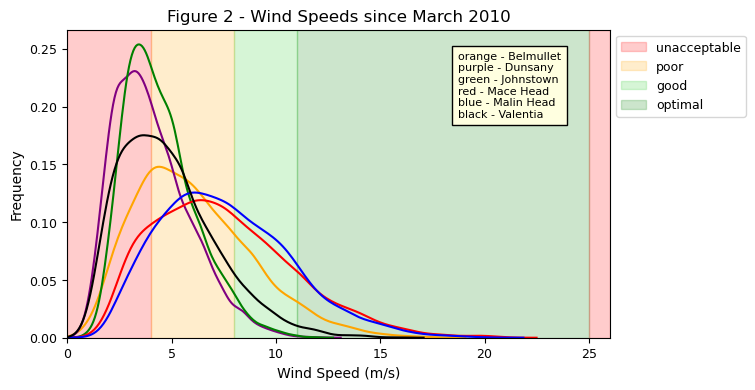

In [139]:
fig, ax_combined = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax_combined.axvspan(0, 4, alpha=0.2, color=colours[0])
ax_combined.axvspan(4, 8, alpha=0.2, color=colours[1])
ax_combined.axvspan(8, 11, alpha=0.2, color=colours[2])
ax_combined.axvspan(11, 25, alpha=0.2, color=colours[3])
ax_combined.axvspan(25, 26, alpha=0.2, color=colours[0])
ax_combined.set_title('Figure 2 - Wind Speeds since March 2010', fontsize=12)
ax_combined.set_xlabel('Wind Speed (m/s)', fontsize=10)
ax_combined.set_ylabel('Frequency', fontsize=10)
ax_combined.set_xlim(0, 26)

ax_combined = sns.kdeplot(weather_all["wdspms_belmullet"], ax=ax_combined, color='orange')
ax_combined = sns.kdeplot(weather_all["wdspms_dunsany"], ax=ax_combined, color='purple')
ax_combined = sns.kdeplot(weather_all["wdspms_johnstown"], ax=ax_combined, color='green')
ax_combined = sns.kdeplot(weather_all["wdspms_macehead"], ax=ax_combined, color='red')
ax_combined = sns.kdeplot(weather_all["wdspms_malinhead"], ax=ax_combined, color='blue')
ax_combined = sns.kdeplot(weather_all["wdspms_valentia"], ax=ax_combined, color='black')
colour_code = "orange - Belmullet\npurple - Dunsany\ngreen - Johnstown\nred - Mace Head\nblue - Malin Head\nblack - Valentia"
ax_combined.text(0.72, 0.93, colour_code, transform=ax_combined.transAxes, fontsize=8, va='top', bbox=dict(facecolor='lightyellow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=output, fontsize = 9)
plt.show()

In [140]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 

def categorise_wind(df):
    temp_df=df
    temp_df['category']=''
    count=0
    for row in temp_df.itertuples():
        if row.wdsp_ms <= 4.0:
            temp_df.loc[count, 'category'] = output[0]
        elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
            temp_df.loc[count, 'category'] = output[1]
        elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
            temp_df.loc[count, 'category'] = output[2]
        elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
            temp_df.loc[count, 'category'] = output[3]
        else:
            temp_df.loc[count, 'category'] = output[0]
        count += 1
    return temp_df

weather_belmullet = categorise_wind(weather_belmullet)
weather_dunsany = categorise_wind(weather_dunsany)
weather_johnstown = categorise_wind(weather_johnstown)
weather_macehead = categorise_wind(weather_macehead)
weather_malinhead = categorise_wind(weather_malinhead)
weather_valentia = categorise_wind(weather_valentia)

weather_all['category_belmullet'] = weather_belmullet['category']
weather_all['category_dunsany'] = weather_dunsany['category']
weather_all['category_johnstown'] = weather_johnstown['category']
weather_all['category_macehead'] = weather_macehead['category']
weather_all['category_malinhead'] = weather_malinhead['category']
weather_all['category_valentia'] = weather_valentia['category']

summary_belmullet = weather_belmullet['category'].value_counts().reindex(output)
summary_dunsany = weather_dunsany['category'].value_counts().reindex(output)
summary_johnstown = weather_johnstown['category'].value_counts().reindex(output)
summary_macehead = weather_macehead['category'].value_counts().reindex(output)
summary_malinhead = weather_malinhead['category'].value_counts().reindex(output)
summary_valentia = weather_valentia['category'].value_counts().reindex(output)

summary_all = summary_belmullet.copy()
summary_all = summary_all.to_frame('count_belmullet')
summary_all['count_dunsany'] = summary_dunsany.to_frame('count_dunsany')
summary_all['count_johnstown'] = summary_johnstown.to_frame('count_johnstown')
summary_all['count_macehead'] = summary_macehead.to_frame('count_macehead')
summary_all['count_malinhead'] = summary_malinhead.to_frame('count_malinhead')
summary_all['count_valentia'] = summary_valentia.to_frame('count_valentia')
summary_all.head(6)

,count_belmullet,count_dunsany,count_johnstown,count_macehead,count_malinhead,count_valentia
category,,,,,,
unacceptable,1384,2964,2462,811,638,2222
poor,2781,2246,2722,2461,2535,2629
good,925,175,202,1328,1495,455
optimal,299,4,3,789,721,83


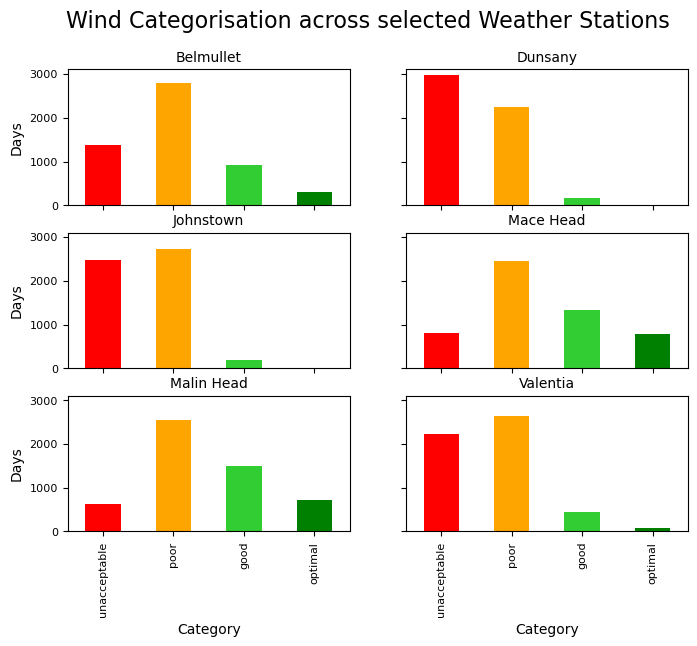

In [141]:
fig_all, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex='col', sharey='row')
fig_all.suptitle('Wind Categorisation across selected Weather Stations', fontsize=16)
summary_all.get('count_belmullet').plot.bar(ax=ax_all[0,0],color=[colourmap[key] for key in summary_all.index])

ax_all[0,0].set_title('Belmullet', fontsize=10)
ax_all[0,0].set_ylabel('Days', fontsize=10)
ax_all[0,0].tick_params(axis='y', labelsize=8)
ax_all[0,0].set_ylim(0, 3100)

summary_all.get('count_dunsany').plot.bar(ax=ax_all[0,1],color=[colourmap[key] for key in summary_all.index])
ax_all[0,1].set_title('Dunsany', fontsize=10)

summary_all.get('count_johnstown').plot.bar(ax=ax_all[1,0],color=[colourmap[key] for key in summary_all.index])
ax_all[1,0].set_title('Johnstown', fontsize=10)
ax_all[1,0].set_ylabel('Days', fontsize=10)
ax_all[1,0].tick_params(axis='y', labelsize=8)
ax_all[1,0].set_ylim(0, 3100)

summary_all.get('count_macehead').plot.bar(ax=ax_all[1,1],color=[colourmap[key] for key in summary_all.index])
ax_all[1,1].set_title('Mace Head', fontsize=10)

summary_all.get('count_malinhead').plot.bar(ax=ax_all[2,0],color=[colourmap[key] for key in summary_all.index])
ax_all[2,0].set_title('Malin Head', fontsize=10)
ax_all[2,0].set_ylabel('Days', fontsize=10)
ax_all[2,0].tick_params(axis='x', labelsize=8)
ax_all[2,0].tick_params(axis='y', labelsize=8)
ax_all[2,0].set_xlabel('Category', fontsize=10)
ax_all[2,0].set_ylim(0, 3100)

summary_all.get('count_valentia').plot.bar(ax=ax_all[2,1],color=[colourmap[key] for key in summary_all.index])
ax_all[2,1].set_title('Valentia', fontsize=10)
ax_all[2,1].set_xlabel('Category', fontsize=10)
ax_all[2,1].tick_params(axis='x', labelsize=8)

plt.show()

## Forward View
In this section, we will extrapolate the 1 month mean line to see if there  wind is going to 

[Datacamp](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python) was used as a refresher on calculating best fit coefficients, particularly where the x-axis is a date.

The following code block contains a function which is used to clean up the monthly data and calculate the best fit coefficients for a best fit line. It is called for each of the 6 weather stations.  
  
The best fit line provides an insight into whether the monthly mean wind is trending up or down over the last 2 decades (in some cases there is less than 2 decades of data available, so the avalable data is plotted.)

In [142]:
# Create a function for the common actions that will be repeated for each weather station

def calc_best_fit(mean_wind):

    # Count and replace any missing values with NaN (the csv file contains a white space)
    white_space = (mean_wind['wdsp'] == ' ').sum()
    print("Missing windspeed numbers: ", white_space)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(' ',-999)
    mean_wind['wdsp'] = mean_wind['wdsp'].astype(float)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(-999,np.nan)

    # Convert from knots to m/s
    mean_wind['wdsp']=round(mean_wind['wdsp']*knots_to_metres_per_sec, 2)

    # Consolidate the year and month fields into a datetime yyyy-mm format
    mean_wind['date'] = mean_wind['year'].astype(str) + '-' + mean_wind['month'].astype(str)
    mean_wind['date']= pd.to_datetime(mean_wind['date'], format='%Y-%m').dt.to_period('m')
    mean_wind['datestr'] = mean_wind['date'].astype(str)
    mean_wind['datenum'] = mdates.date2num(mean_wind['date'])

    # Now select the range we are interested in - the last 20 years
    date1 = '2005-01'
    date2 = '2024-11'
    mean_wind = mean_wind.loc[(mean_wind['date']>=date1) & (mean_wind['date']<=date2)]
    mean_wind = mean_wind.reset_index(drop=True)

    # Finally calculate the 1st order best fit line, taking care not to pass NaN values
    idx = np.isfinite(mean_wind['datenum']) & np.isfinite(mean_wind['wdsp'])
    m, c = np.polyfit(mean_wind['datenum'][idx], mean_wind['wdsp'][idx], 1)
    print("m =",m,"c =",c)

    return m, c, mean_wind

check if this data already exists in a database table. If so, use it from there.
If not, read it from the csv files and create the table.

In [143]:
import sqlite3

# Creates a database if it doesn't exist

try:
    with sqlite3.connect("wind") as conn:
        print("Opened SQLite database")
        cursor = conn.cursor()
        sql = "create table if not exists belmullet (year INT, month INT, windspeed FLOAT64)"
        cursor.execute(sql)
        conn.commit()
#ELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}';
# that is, the cursor will have a count of 0 (does not exist) or a count of 1 (does exist)

except sqlite3.OperationalError as e:
    print("Failed to open database:", e)

conn.close()


Opened SQLite database


In [144]:
with sqlite3.connect("wind") as conn:
    print("Connected to SQLite database")
    cursor = conn.cursor()
    sql = "show tables"
    cursor.execute(sql)
conn.close()

Connected to SQLite database


OperationalError: near "show": syntax error

In [ ]:
# Create a dataframe for each weather station with the fields we are interested in

belmullet_mean_wind = pd.read_csv("data/mly2375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("Belmullet:")
m1, c1, belmullet_mean_wind = calc_best_fit(belmullet_mean_wind)

dunsany_mean_wind = pd.read_csv("data/mly1375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nDunsany:")
m2, c2, dunsany_mean_wind = calc_best_fit(dunsany_mean_wind)

johnstown_mean_wind = pd.read_csv("data/mly1775.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nJohnstown Castle:")
m3, c3, johnstown_mean_wind = calc_best_fit(johnstown_mean_wind)

macehead_mean_wind = pd.read_csv("data/mly275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nMace Head:")
m4, c4, macehead_mean_wind = calc_best_fit(macehead_mean_wind)

malinhead_mean_wind = pd.read_csv("data/mly1575.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nMalin Head:")
m5, c5, malinhead_mean_wind = calc_best_fit(malinhead_mean_wind)

valentia_mean_wind = pd.read_csv("data/mly2275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nValentia Island:")
m6, c6, valentia_mean_wind = calc_best_fit(valentia_mean_wind)


Belmullet:
Missing windspeed numbers:  0
m = 2.684861328079356e-05 c = 5.575142579168166

Dunsany:
Missing windspeed numbers:  0
m = -1.3142094030997162e-05 c = 4.294653081086979

Johnstown Castle:
Missing windspeed numbers:  3
m = 5.7140520178660175e-05 c = 3.384087643177611

Mace Head:
Missing windspeed numbers:  2
m = 4.370508953987027e-05 c = 6.692565415082731

Malin Head:
Missing windspeed numbers:  1
m = 2.6582884780488225e-05 c = 7.082986025297201

Valentia Island:
Missing windspeed numbers:  2
m = 3.543320265168775e-05 c = 4.203132440032189


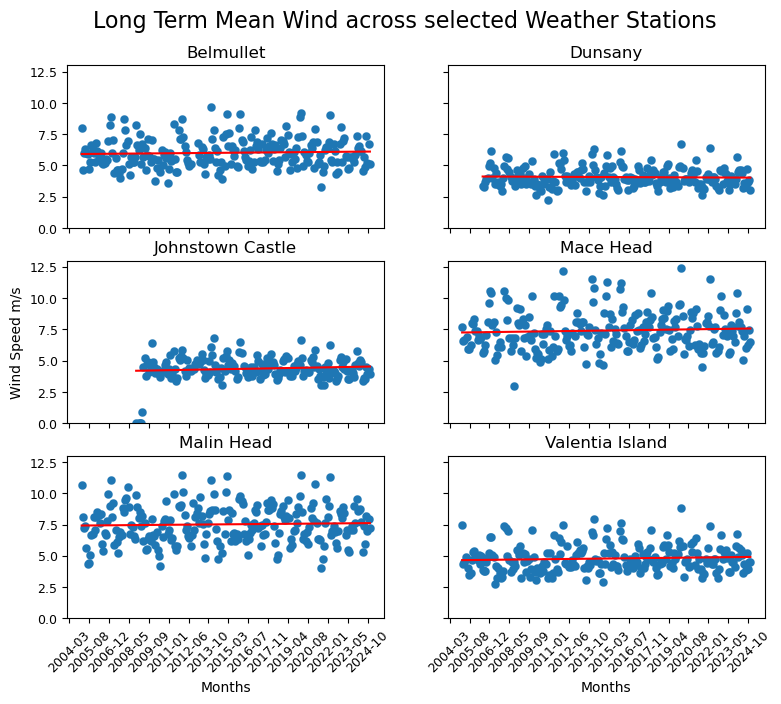

In [ ]:
fig_mean, axes_mean = plt.subplots(nrows=3, ncols=2, figsize=(9, 7), sharex='col', sharey='row')
fig_mean.suptitle('Long Term Mean Wind across selected Weather Stations', fontsize=16)
fig_mean.subplots_adjust(top = 0.9)
date_form = mdates.DateFormatter("%Y-%m")

axes_mean[0,0].plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[0,0].plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['datenum']*m1 + c1, 'r-')
axes_mean[0,0].set_title('Belmullet', fontsize=12)
axes_mean[0,0].tick_params(axis='y', labelsize=9)
axes_mean[0,0].set_ylim(0, 13)

axes_mean[0,1].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[0,1].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['datenum']*m2 + c2, 'r-')
axes_mean[0,1].set_title('Dunsany', fontsize=12)

axes_mean[1,0].plot(johnstown_mean_wind['datenum'], johnstown_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[1,0].plot(johnstown_mean_wind['datenum'], johnstown_mean_wind['datenum']*m3 + c3, 'r-')
axes_mean[1,0].set_title('Johnstown Castle', fontsize=12)
axes_mean[1,0].tick_params(axis='y', labelsize=9)
axes_mean[1,0].set_ylabel('Wind Speed m/s', fontsize=10)
axes_mean[1,0].set_ylim(0, 13)

axes_mean[1,1].plot(macehead_mean_wind['datenum'], macehead_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[1,1].plot(macehead_mean_wind['datenum'], macehead_mean_wind['datenum']*m4 + c4, 'r-')
axes_mean[1,1].set_title('Mace Head', fontsize=12)

axes_mean[2,0].plot(malinhead_mean_wind['datenum'], malinhead_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[2,0].plot(malinhead_mean_wind['datenum'], malinhead_mean_wind['datenum']*m5 + c5, 'r-')
axes_mean[2,0].set_title('Malin Head', fontsize=12)
axes_mean[2,0].xaxis.set_major_formatter(date_form)
axes_mean[2,0].xaxis.set_major_locator(plt.MaxNLocator(16))
axes_mean[2,0].tick_params(axis='y', labelsize=9)
axes_mean[2,0].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,0].set_xlabel('Months', fontsize=10)

axes_mean[2,1].plot(valentia_mean_wind['datenum'], valentia_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[2,1].plot(valentia_mean_wind['datenum'], valentia_mean_wind['datenum']*m6 + c6, 'r-')
axes_mean[2,1].set_title('Valentia Island', fontsize=12)
axes_mean[2,1].xaxis.set_major_formatter(date_form)
axes_mean[2,1].xaxis.set_major_locator(plt.MaxNLocator(16))
axes_mean[2,1].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,1].set_xlabel('Months', fontsize=10)
axes_mean[2,0].set_ylim(0, 13)

plt.show()

## References
g1. https://en.wikipedia.org/wiki/Galway_Wind_Park

https://stackoverflow.com/questions/69335720/overlay-shaded-regions-on-a-line-plot-based-on-conditions
